# Automated Loan Application Processing
This notebook analyzes the structure and content of loan application documents to understand formatting, common terminologies, and document structure.
## Setup and Dependencies
First, let's import the necessary libraries and set up our environment.

In [1]:
import json
import pandas as pd
from collections import Counter
import re
from typing import Dict, List, Any
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

## Data Exploration & Preprocessing
### Examine the Data
Let's load the loan application data from the JSON file.

In [2]:
def load_data(json_file: str = "loan_applications.json") -> List[Dict[str, Any]]:
    #Load the JSON data file
    with open(json_file, 'r') as f:
        return json.load(f)

# Load the data
data = load_data()
print(f"Loaded {len(data)} loan applications")

Loaded 100 loan applications


Let's examine the structure of a sample document to understand its organization.

In [3]:
def get_sample_document(data: List[Dict[str, Any]], index: int = 0) -> Dict[str, Any]:
    """Get a sample document for inspection"""
    return data[index]

# Get and display a sample document structure
sample = get_sample_document(data)
print("Document Structure:")
for key in sample.keys():
    print(f"- {key}")

Document Structure:
- application_id
- application_date
- personal_info
- employment_info
- financial_info
- loan_details


Now, we analyze the text fields in the documents to understand their content and patterns.

In [5]:
# Function to analyze text fields
def analyze_text_fields(data: List[Dict[str, Any]]) -> Dict[str, List[str]]:
    """Analyze all text fields in the documents"""
    text_fields = {
        'personal_statement': [],
        'career_narrative': [],
        'financial_statement': [],
        'debt_explanation': [],
        'purpose_statement': [],
        'repayment_plan': []
    }
    
    for app in data:
        personal_info = app['personal_info']
        employment_info = app['employment_info']
        financial_info = app['financial_info']
        loan_details = app['loan_details']
        
        text_fields['personal_statement'].append(personal_info['personal_statement'])
        text_fields['career_narrative'].append(employment_info['career_narrative'])
        text_fields['financial_statement'].append(financial_info['financial_statement'])
        text_fields['debt_explanation'].append(financial_info['debt_explanation'])
        text_fields['purpose_statement'].append(loan_details['purpose_statement'])
        text_fields['repayment_plan'].append(loan_details['repayment_plan'])
    
    return text_fields

# Function to analyze field lengths
def analyze_field_lengths(text_fields: Dict[str, List[str]]) -> Dict[str, Dict[str, float]]:
    """Analyze the length of text fields"""
    stats = {}
    for field, texts in text_fields.items():
        lengths = [len(text.split()) for text in texts]
        stats[field] = {
            'mean_length': sum(lengths) / len(lengths),
            'min_length': min(lengths),
            'max_length': max(lengths)
        }
    return stats

# Perform text field analysis
text_fields = analyze_text_fields(data)
field_lengths = analyze_field_lengths(text_fields)

In [6]:
# Function to extract common terms
def extract_common_terms(text_list: List[str], top_n: int = 10) -> List[tuple]:
    """Extract most common terms from a list of texts"""
    all_words = []
    for text in text_list:
        words = re.findall(r'\w+', text.lower())
        all_words.extend(words)
    
    common_words = {'the', 'and', 'a', 'an', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'my', 'i', 'is', 'are', 'be', 'this', 'that', 'have', 'has', 'had'}
    filtered_words = [word for word in all_words if word not in common_words]
    
    return Counter(filtered_words).most_common(top_n)

# Display text field statistics
print("Text Field Statistics:")
for field, stats in field_lengths.items():
    print(f"\n{field.replace('_', ' ').title()}:")
    print(f"Average length: {stats['mean_length']:.1f} words")
    print(f"Min length: {stats['min_length']} words")
    print(f"Max length: {stats['max_length']} words")
    
    common_terms = extract_common_terms(text_fields[field])
    print("\nMost common terms:")
    for term, count in common_terms:
        print(f"- {term}: {count}")

Text Field Statistics:

Personal Statement:
Average length: 31.1 words
Min length: 26 words
Max length: 38 words

Most common terms:
- loan: 100
- years: 81
- been: 80
- history: 70
- am: 62
- me: 60
- stable: 58
- credit: 53
- financial: 52
- income: 46

Career Narrative:
Average length: 29.1 words
Min length: 23 words
Max length: 37 words

Most common terms:
- career: 101
- experience: 63
- professional: 48
- expertise: 43
- years: 39
- developed: 39
- progression: 39
- reflects: 39
- commitment: 39
- built: 37

Financial Statement:
Average length: 24.8 words
Min length: 20 words
Max length: 32 words

Most common terms:
- been: 73
- while: 73
- financial: 68
- credit: 53
- history: 46
- savings: 46
- past: 41
- managing: 40
- finances: 40
- years: 40

Debt Explanation:
Average length: 22.6 words
Min length: 18 words
Max length: 28 words

Most common terms:
- debt: 135
- obligations: 78
- current: 71
- managed: 42
- history: 35
- shows: 35
- successfully: 35
- continue: 35
- position:

Create visualizations to better understand the data patterns.

In [7]:
# Function to analyze loan types
def analyze_loan_types(data: List[Dict[str, Any]]) -> Dict[str, int]:
    """Analyze the distribution of loan types"""
    loan_types = [app['loan_details']['loan_type'] for app in data]
    return dict(Counter(loan_types))

# Analyze loan types
loan_types = analyze_loan_types(data)


Generating word clouds...


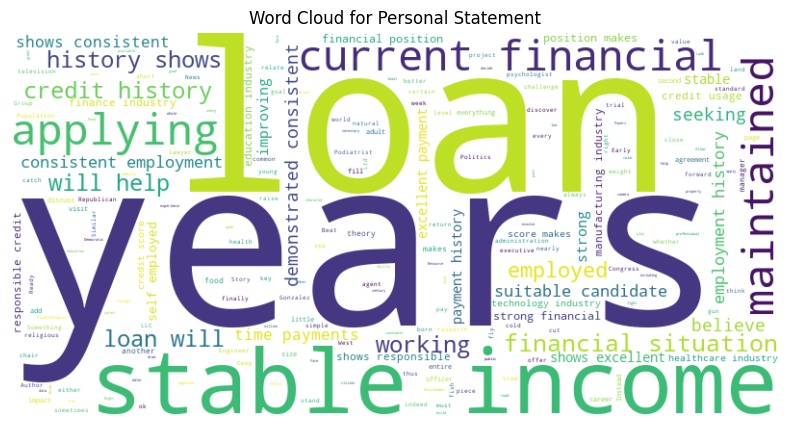

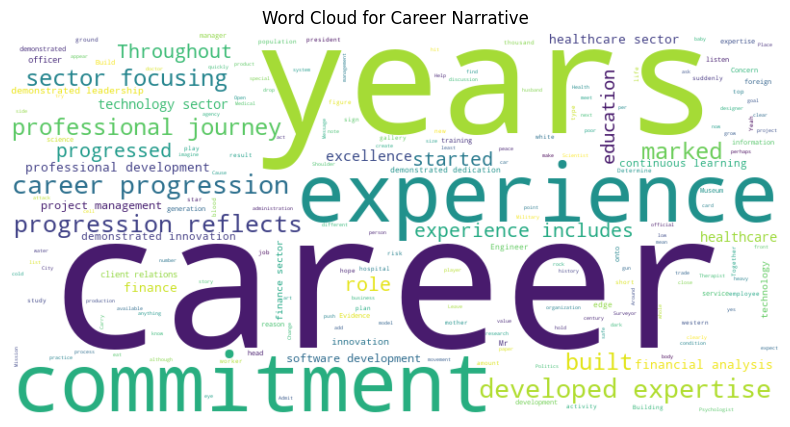

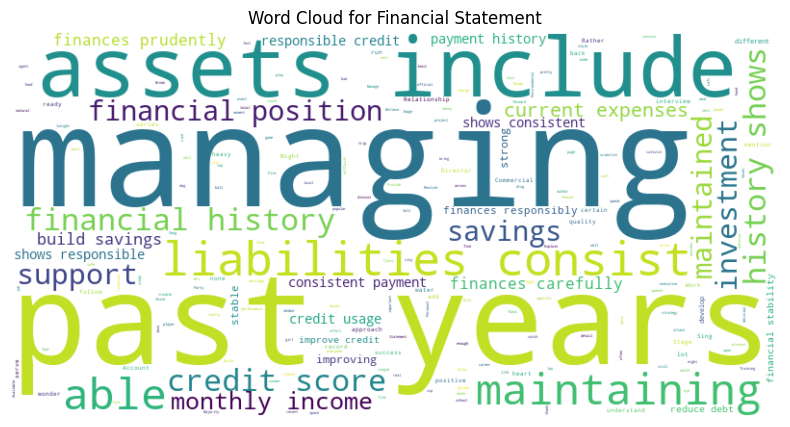

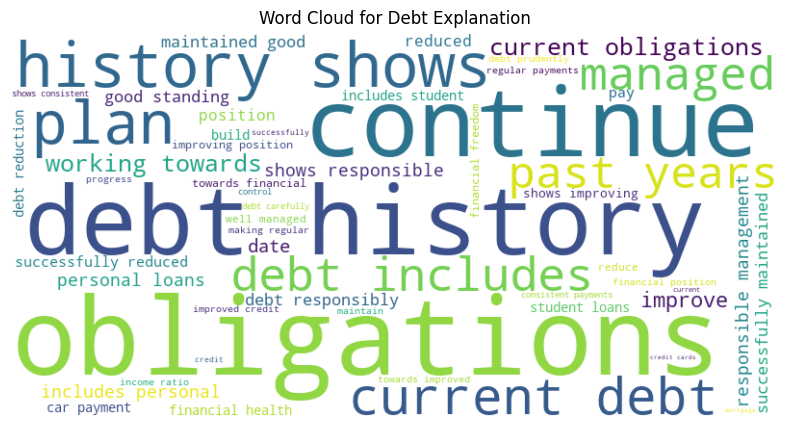

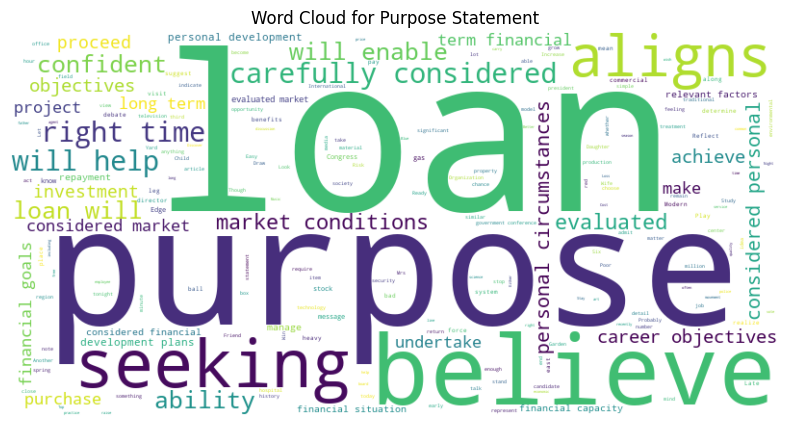

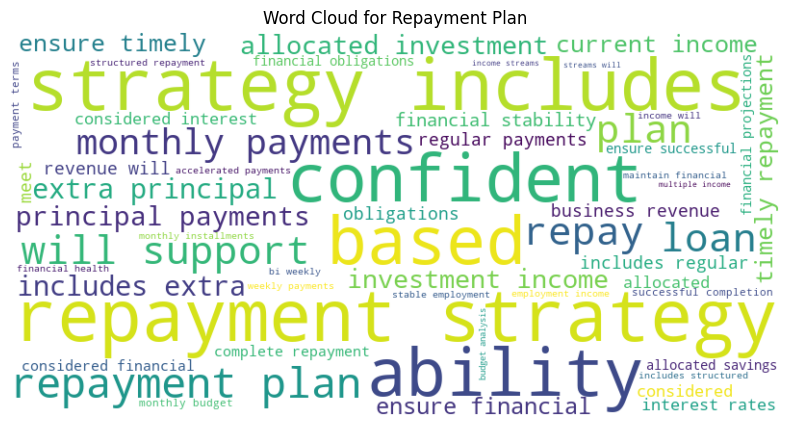

In [8]:
# Function to generate word cloud
def generate_word_cloud(text: str, title: str):
    """Generate a word cloud for a given text"""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds
print("\nGenerating word clouds...")
for field, texts in text_fields.items():
    combined_text = ' '.join(texts)
    generate_word_cloud(combined_text, f"Word Cloud for {field.replace('_', ' ').title()}")

Analyze the distribution of different loan types in the dataset.

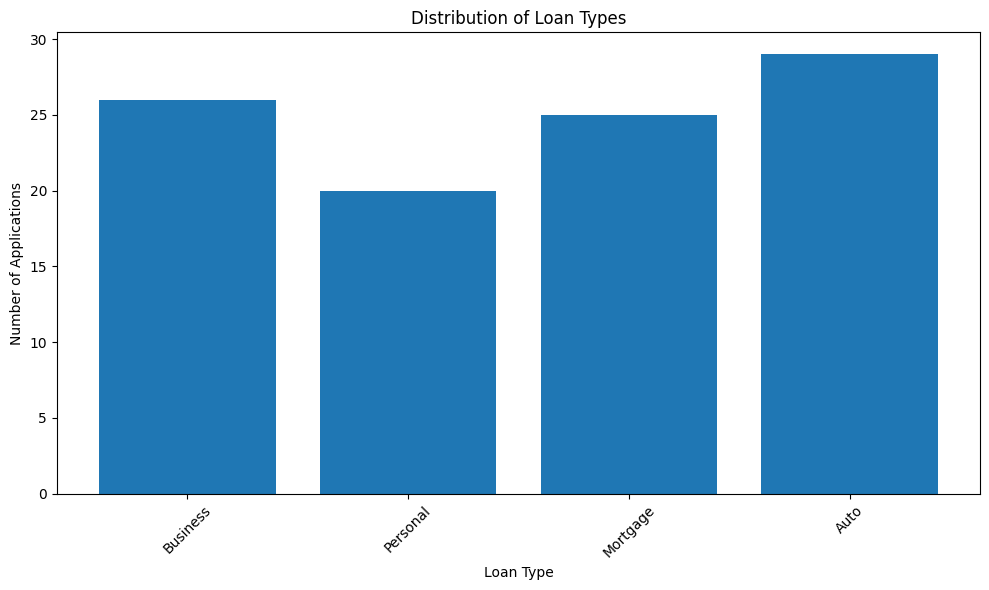


Loan Type Distribution:
Business: 26 applications
Personal: 20 applications
Mortgage: 25 applications
Auto: 29 applications


In [9]:
# Create loan type distribution plot
plt.figure(figsize=(10, 6))
plt.bar(loan_types.keys(), loan_types.values())
plt.title('Distribution of Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print loan type distribution
print("\nLoan Type Distribution:")
for loan_type, count in loan_types.items():
    print(f"{loan_type}: {count} applications")

Now, we visualize the distribution of text lengths for each field.

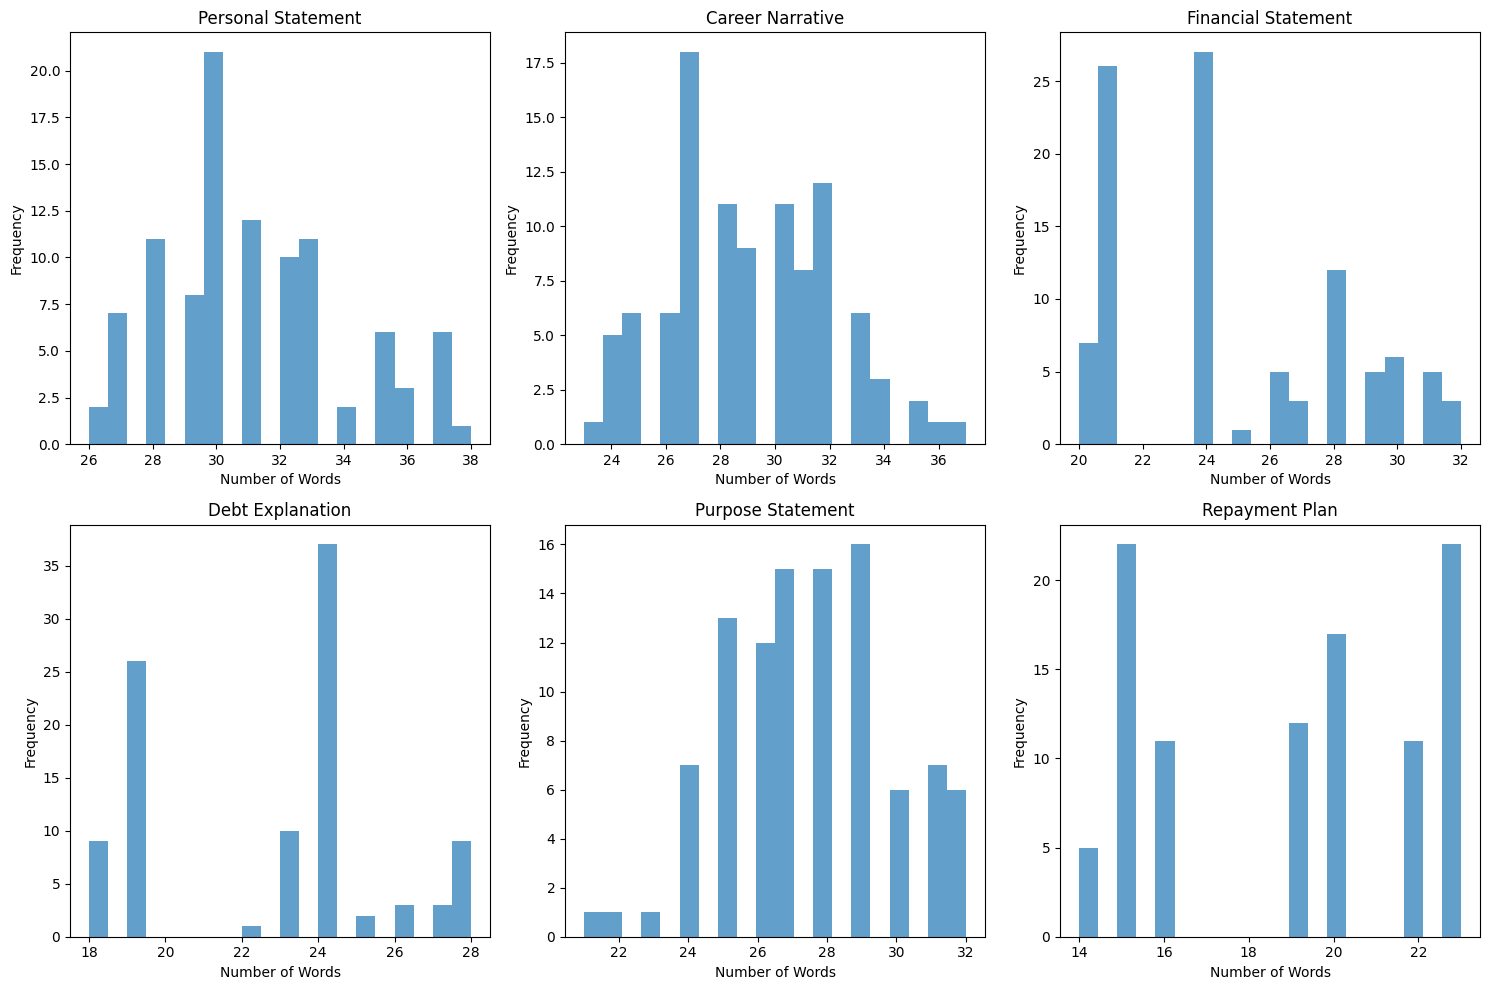

In [10]:
# Create text length distribution plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (field, texts) in enumerate(text_fields.items()):
    lengths = [len(text.split()) for text in texts]
    axes[idx].hist(lengths, bins=20, alpha=0.7)
    axes[idx].set_title(field.replace('_', ' ').title())
    axes[idx].set_xlabel('Number of Words')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Create a summary table of the text field statistics.

In [11]:
# Create summary statistics table
stats_df = pd.DataFrame(field_lengths).T
stats_df.columns = ['Mean Length', 'Min Length', 'Max Length']
print("\nSummary Statistics:")
stats_df


Summary Statistics:


,Mean Length,Min Length,Max Length
personal_statement,31.12,26.0,38.0
career_narrative,29.09,23.0,37.0
financial_statement,24.82,20.0,32.0
debt_explanation,22.57,18.0,28.0
purpose_statement,27.49,21.0,32.0
repayment_plan,18.92,14.0,23.0


### Text Cleaning and Preprocessing
#### Cleaning Strategy
1. **Text Normalization**:
   - Convert text to lowercase
   - Remove special characters and punctuation
   - Remove extra whitespace

2. **Tokenization**:
   - Split text into individual words
   - Handle contractions and special cases

3. **Stop Word Removal**:
   - Remove common English stop words
   - Remove custom stop words specific to loan applications

4. **Lemmatization**:
   - Convert words to their base form
   - Handle different verb tenses and noun forms

5. **Custom Cleaning**:
   - Remove numbers and currency symbols
   - Handle specific loan-related terms
   - Remove personal identifiers (if present)

Let's implement these cleaning steps and see the transformations.